In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from astropy.time import Time
from astropy.table import Table
from nuztfpaper.style import output_folder, big_fontsize, base_width, base_height, dpi, plot_dir
from nuztfpaper.candidates import candidates
from nuztfpaper.alerts import obs, tot_nu_area
import seaborn as sns
import json
from astropy.time import Time

/Users/robertstein/Code/ztf_nu_paper_code/nuztfpaper/alerts.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non["Rejection reason"][mask] = new


In [2]:
for nu in list(set(candidates["neutrino"])):
    
    cands = candidates[candidates["neutrino"] == nu]

    text = r"""
    \begin{table*}
    \centering
        \begin{tabular}{||c | c c c ||} 
        \hline
        \textbf{ZTF Name} & \textbf{IAU Name} & \textbf{Classification} & \textbf{Peak Apparent Magnitude} \\
        \hline
    """

    for _, crow in cands.iterrows():

        text += f"\t {crow['Name']} & {crow['IAU Name']} & {crow['Classification']} & {crow['max brightness']} \\\\ \n"


    text +=f"""
        \end{{tabular}}
        \caption{{Candidates for {nu}.}}
        \label{{tab:{str(nu.lower())}}}
    \end{{table*}}
    """

    print(text)
    
    


    \begin{table*}
    \centering
        \begin{tabular}{||c | c c c ||} 
        \hline
        \textbf{ZTF Name} & \textbf{IAU Name} & \textbf{Classification} & \textbf{Peak Apparent Magnitude} \\
        \hline
    	 ZTF18abolwbb & nan & AGN Variability & 19.4 (r) \\ 
	 ZTF18abueqkl & AT2020kqj & AGN Variability & 19.3 (g) \\ 
	 ZTF18acehkni & nan & AGN Variability & 19.4 (r) \\ 
	 ZTF18actxchc & nan & AGN Variability & 18.0 (g) \\ 
	 ZTF19aadaszg & SN2019rg & SN Ia & 15.9 (r) \\ 
	 ZTF19aawnawu & nan & AGN Variability? & 20.0 (g) \\ 
	 ZTF19aaycone & nan & AGN Variability & 17.9 (g) \\ 
	 ZTF19aaycool & nan & AGN Variability & 20.3 (g) \\ 
	 ZTF19aaycosc & nan & AGN Variability & 19.3 (r) \\ 
	 ZTF19aaycoxd & nan & AGN Variability & 20.3 (g) \\ 
	 ZTF19abahiwr & AT2019izf & Unclassified & 19.5 (r) \\ 
	 ZTF19abahiya & nan & Unclassified & 19.6 (r) \\ 
	 ZTF19abahizn & nan & AGN Variability? & 19.7 (g) \\ 
	 ZTF19abahjcp & nan & AGN Variability & 20.2 (g) \\ 
	 ZTF19abahlep & nan 

In total there are 162 candidates from 24 neutrinos convering 154.33 sq. deg. This is a density of 1.05 candidates per sq. deg. of sky.
After removing ['Artifact', 'Star', 'AGN Variability'], we are left with 66 candidates, a reduction of 59.3%. This leaves  0.43 good candidates per sq. deg. of sky.


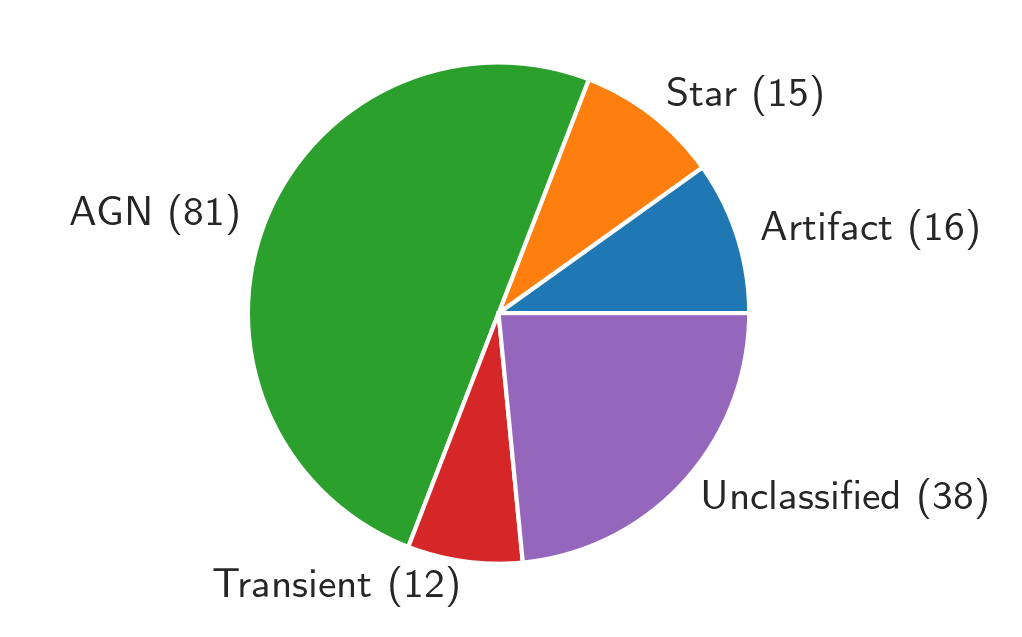

In [3]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

labels = []
sizes = []

for i, l in enumerate(list(set(candidates["base_class"]))):
    s = list(candidates["base_class"]).count(l)
    sizes.append(s)
    labels.append(f"{l} ({s})")
    
def absolute_value(val):
    a  = np.round(val/100.*np.sum(sizes), 0)
    return int(a)

boring = ["Artifact", "Star", "AGN Variability"]

interesting_mask = [x not in boring for x in candidates["sub_class"]]

print(f"In total there are {len(candidates)} candidates from {len(obs)} neutrinos convering {tot_nu_area:.2f} sq. deg. " 
      f"This is a density of {float(len(candidates))/tot_nu_area:.2f} candidates per sq. deg. of sky.")


print(f"After removing {boring}, we are left with {np.sum(interesting_mask)} candidates, "
      f"a reduction of {100. * (1. - np.sum(interesting_mask)/float(len(candidates))):.1f}%. "
      f"This leaves  {np.sum(interesting_mask)/tot_nu_area:.2f} good candidates per sq. deg. of sky."
     )

patches, texts = ax1.pie(sizes, 
                         labels=labels, 
                         textprops={'fontsize': big_fontsize}
                        )

ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

filename = "candidates.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(os.path.join(plot_dir, filename))
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

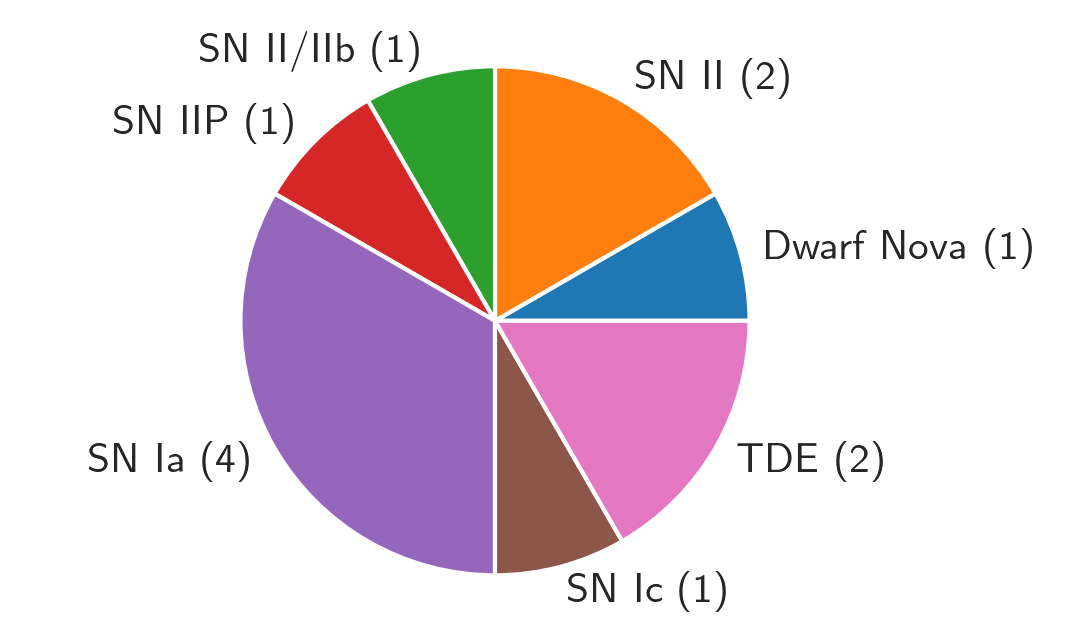

In [4]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

labels = []
sizes = []

e = 0.00

tranclass = candidates["sub_class"][candidates["base_class"] == "Transient"]

for x in list(set(tranclass)):
    if x not in labels:
        labels.append(x)
        
for i, l in enumerate(sorted(labels)):
    s = list(tranclass).count(l)
    sizes.append(s)
    labels[i] = f"{l} ({s})"
    
def absolute_value(val):
    a  = np.round(val/100.*np.sum(sizes), 0)
    return int(a)

patches, texts = ax1.pie(sizes, 
                         labels=labels, 
                         textprops={'fontsize': big_fontsize}
                        )

ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

filename = "transient_pie.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(os.path.join(plot_dir, filename))
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

/var/folders/hd/1411jr114w9cvmmnw9mx0xvr0000gn/T/ipykernel_85746/1855677885.py:22: RuntimeWarning: invalid value encountered in true_divide
  fs = (n[1] - n[0])/(n[1])


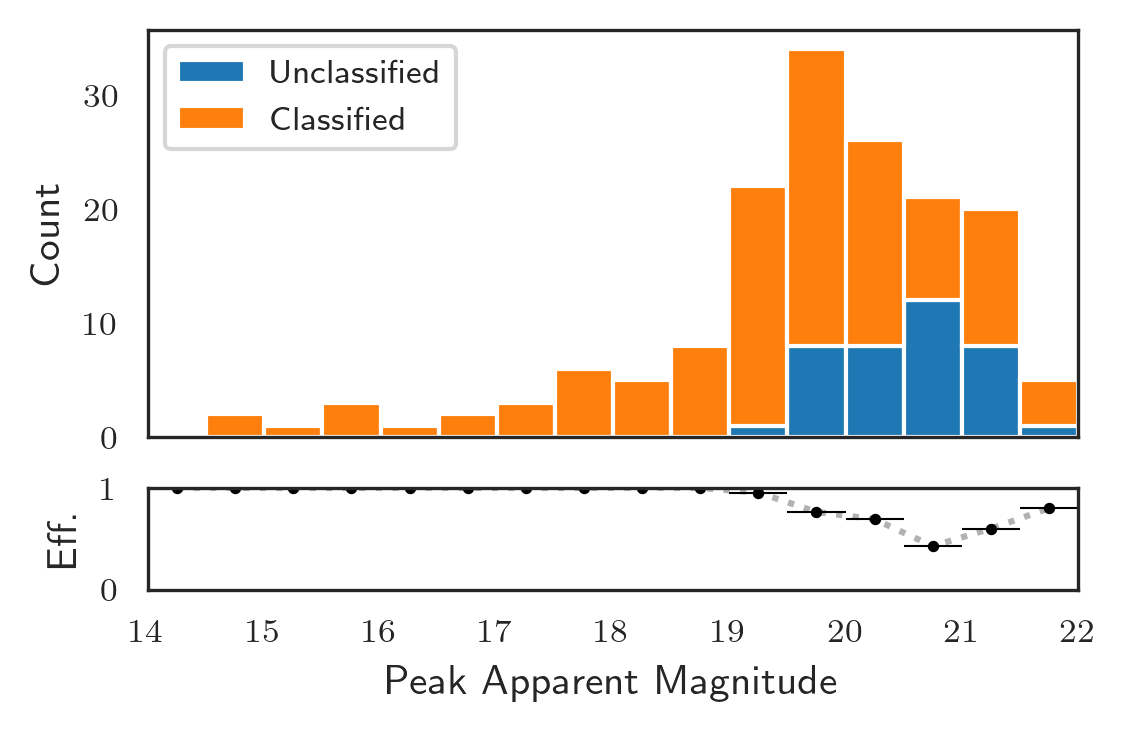

In [5]:
mask = np.array([x in ["Unclassified", "Unknown"] for x in candidates["base_class"]])

bins = np.linspace(14, 22, 17)
mids = 0.5*(bins[:-1] + bins[1:])

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot2grid((4, 1), (0, 0), colspan=3, rowspan=3)

n, _, _ = plt.hist(
    [candidates[mask]["max_brightness"], candidates[~mask]["max_brightness"]],
    label=["Unclassified", "Classified"],
    bins=bins,
    stacked=True
)

ax1.set_ylabel("Count")

plt.legend()

ax2 = plt.subplot2grid((4, 1), (3, 0), colspan=3, rowspan=1, sharex=ax1)

fs = (n[1] - n[0])/(n[1])
fs[np.isnan(fs)] = 1.

ax2.scatter(mids, fs, color="k", s=3.)
ax2.errorbar(mids, fs, color="k", linestyle=" ", xerr=0.25, elinewidth=0.5)
ax2.plot(mids, fs, alpha=0.3, color="k", linestyle=":")
ax2.set_ylim(0.0, 1.0)
ax2.set_ylabel("Eff.")

xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlim(bins[0], bins[-1])
plt.subplots_adjust(hspace=0.5)

ax2.set_xlabel("Peak Apparent Magnitude", fontsize=big_fontsize)

filename = "completeness.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(os.path.join(plot_dir, filename))
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [6]:
cb = 19.5
mask = mids > cb
ncut = (n.T[mask]).T

av_eff = np.sum(ncut[1]-ncut[0])/np.sum(ncut[1])
print(f"There are {int(np.sum(ncut[1]))} candidates fainter than {cb}, " 
      f"yielding an average classification efficiency of {100.*av_eff:.1f} %")

There are 106 candidates fainter than 19.5, yielding an average classification efficiency of 65.1 %


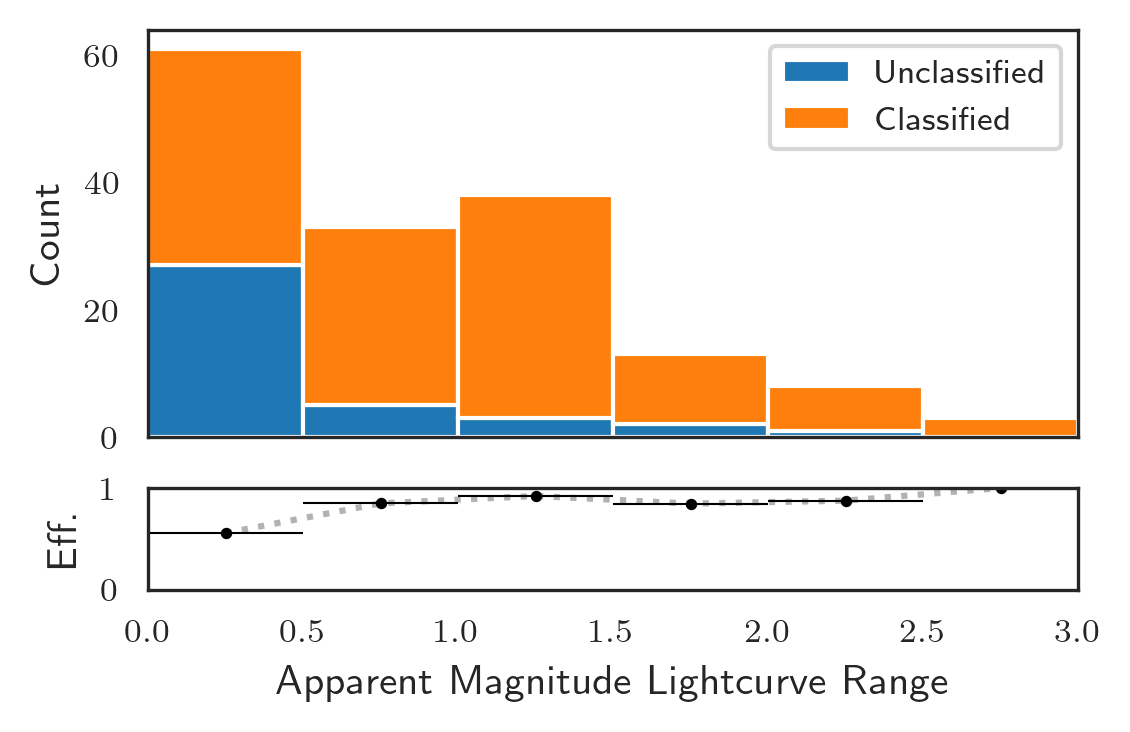

In [7]:
mask = np.array([x in ["Unclassified", "Unknown"] for x in candidates["base_class"]])


bins = np.linspace(0.0, 3.0, 7)
mids = 0.5*(bins[:-1] + bins[1:])

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot2grid((4, 1), (0, 0), colspan=3, rowspan=3)

n, _, _ = plt.hist(
    [list(candidates["max_range"][mask]), list(candidates["max_range"][~mask])],
    label=["Unclassified", "Classified"],
    bins=bins,
    stacked=True
)

ax1.set_ylabel("Count")

plt.legend()

ax2 = plt.subplot2grid((4, 1), (3, 0), colspan=3, rowspan=1, sharex=ax1)

fs = (n[1] - n[0])/(n[1])
fs[np.isnan(fs)] = 1.

ax2.scatter(mids, fs, color="k", s=3.)
ax2.errorbar(mids, fs, color="k", linestyle=" ", xerr=0.25, elinewidth=0.5)
ax2.plot(mids, fs, alpha=0.3, color="k", linestyle=":")
ax2.set_ylim(0.0, 1.0)
ax2.set_ylabel("Eff.")

xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlim(bins[0], bins[-1])
plt.subplots_adjust(hspace=0.5)

ax2.set_xlabel("Apparent Magnitude Lightcurve Range", fontsize=big_fontsize)

filename = "completeness_range.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(os.path.join(plot_dir, filename))
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

Text(0.5, 0, 'Peak Apparent Magnitude')

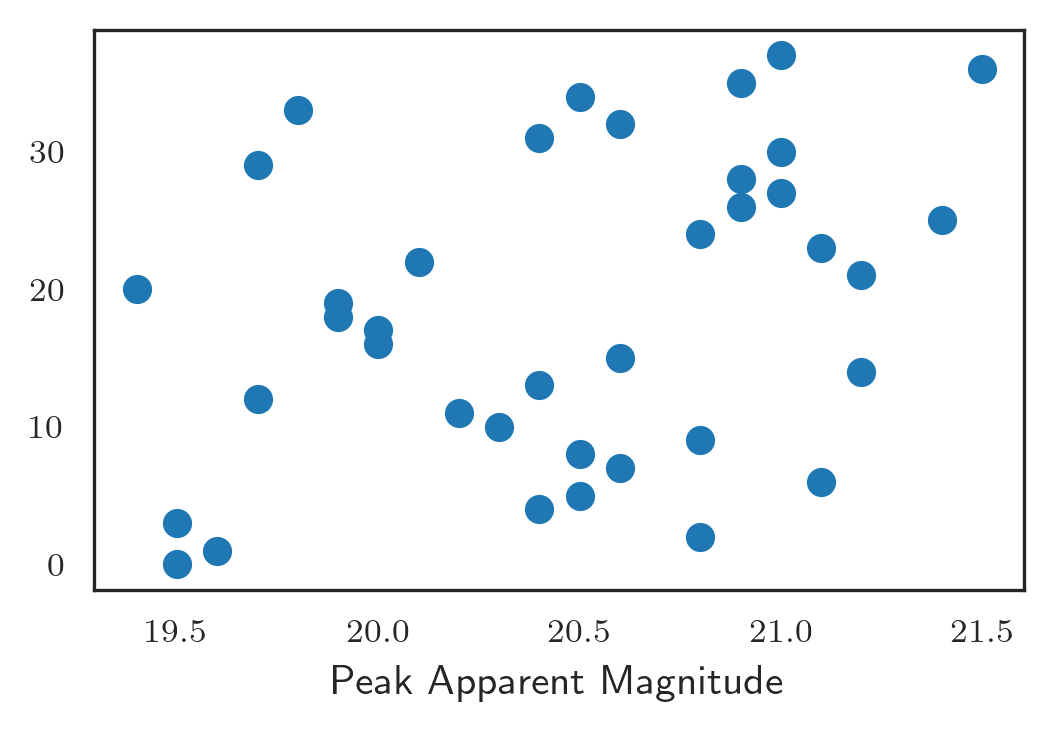

In [15]:
mask = candidates["base_class"] == "Unclassified"
unk = candidates[mask]

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

plt.scatter(unk["max_brightness"], range(np.sum(mask)))
plt.xlabel("Peak Apparent Magnitude", fontsize=big_fontsize)

# output_path = os.path.join(output_folder, filename)
# plt.savefig(os.path.join(plot_dir, filename))
# plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [16]:
mask = ["AGN" in x for x in candidates["base_class"]]
agn = candidates[mask]

text=""

for _, c in candidates.iterrows():
    if c["base_class"] in ["AGN Flare", "Unknown", "Unclassified"]:
        text += f"{c['Name']}\n"
    
print(text)


ZTF19abahiwr
ZTF19abahiya
ZTF19abahlep
ZTF19abwaurq
ZTF19acbpqfn
ZTF19acbpqui
ZTF19acbxahc
ZTF19acbxanz
ZTF19acbxaqj
ZTF19acbxauk
ZTF19acbxbjq
ZTF19accnqlc
ZTF19acmwlds
ZTF20aaeuufe
ZTF20aaevfth
ZTF20aaevfwa
ZTF20aagwcuq
ZTF20aagwcuu
ZTF20aagwcuv
ZTF20aagxfta
ZTF19acxopgh
ZTF20aaglixd
ZTF20aaxcdok
ZTF20abdnowp
ZTF20abdnoxm
ZTF20abdnoyu
ZTF20abdnpae
ZTF20abdnpbu
ZTF20abdrnlg
ZTF18acccxxf
ZTF20acaapwn
ZTF20acaapwo
ZTF20acmxnpa
ZTF20acuqdeu
ZTF20acxbkpz
ZTF21aajxjrv
ZTF21aajxjry
ZTF20acinvxv



# Neutrino statistics

In [ ]:
dates = [Time(f"20{x[2:4]}-{x[4:6]}-{x[6:8]}T00:00:01") for x in joint["Event"]]

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

mjds = []
labs = []
bins = []

for year in range(2016, 2022):
    for k, month in enumerate([1, 4, 7, 10]):
        
        t = Time(f"{year}-{month}-01T00:00:00.01", format='isot', scale='utc').mjd
        
        bins.append(t)
        
        if (k - 1) % 2 > 0:
                    
            mjds.append(t)
            labs.append(["Jan", "July"][int(k/2)] + f" {year}")
            
t_0 = Time(f"2016-04-01T00:00:00.01", format='isot', scale='utc').mjd 
            
v1_t = Time(f"2019-06-17T00:00:00.01", format='isot', scale='utc').mjd

t_now = Time.now().mjd

alerts_v1 = [x.mjd for i, x in enumerate(dates) if np.logical_and(x.mjd < v1_t, not np.isnan(joint.iloc[i]["Dec"]))]

alerts_v2 = [x.mjd for i, x in enumerate(dates) if np.logical_and(
    x.mjd > v1_t, not np.isnan(joint.iloc[i]["Dec"]))]

print(f'{len(alerts_v1)} V1 alerts, {len(alerts_v2)} V2 alerts')

mod = 7.

v1_rate = mod * float(len(alerts_v1))/(v1_t - t_0)
v2_rate = mod * float(len(alerts_v2))/(t_now - v1_t)

labels = []

for (name, rate) in [("V1", v1_rate), ("V2", v2_rate)]:
    labels.append(f'{name} ({rate:.2f} per week)')
    
plt.xticks(mjds, labs, rotation=80)
plt.locator_params(axis="y", nbins=6)
plt.hist([alerts_v1, alerts_v2], bins=bins, stacked=True, label=labels)

plt.axvline(v1_t, linestyle=":", color="k")

plt.tick_params(axis='both', which='major', labelsize=big_fontsize)
plt.legend(fontsize=big_fontsize, loc="upper left")

plt.ylabel("Alerts (excluding retractions)", fontsize=big_fontsize)

sns.despine()

plt.ylim(0., 12.)
plt.tight_layout()

filename = "alert_hist.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [ ]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

dates = [Time(f"20{x[2:4]}-{x[4:6]}-{x[6:8]}T00:00:01") for x in joint["Event"]]

mjds = []
labs = []
bins = []

for year in range(2016, 2022):
    for k, month in enumerate([1, 4, 7, 10]):
        
        t = Time(f"{year}-{month}-01T00:00:00.01", format='isot', scale='utc').mjd
        
        bins.append(t)
        
        if (k - 1) % 2 > 0:
                    
            mjds.append(t)
            labs.append(["Jan", "July"][int(k/2)] + f" {year}")
            
t_0 = Time(f"2016-04-01T00:00:00.01", format='isot', scale='utc').mjd 
            
v1_t = Time(f"2019-06-17T00:00:00.01", format='isot', scale='utc').mjd

t_now = Time.now().mjd

print(joint.iloc[0]["Dec"])

alerts_v1 = [x.mjd for i, x in enumerate(dates) if np.logical_and(x.mjd < v1_t, not np.isnan(joint.iloc[i]["Dec"]))]

alerts_v2 = [x.mjd for i, x in enumerate(dates) if np.logical_and(
    x.mjd > v1_t, not np.isnan(joint.iloc[i]["Dec"]))]

print(f'{len(alerts_v1)} V1 alerts, {len(alerts_v2)} V2 alerts')

mod = 7.

v1_rate = mod * float(len(alerts_v1))/(v1_t - t_0)
v2_rate = mod * float(len(alerts_v2))/(t_now - v1_t)

labels = []

for (name, rate) in [("HESE/EHE", v1_rate), ("Gold/Bronze", v2_rate)]:
    labels.append(f'{name} ({rate:.2f} per week)')
    
plt.xticks(mjds, labs, rotation=80)
plt.locator_params(axis="y", nbins=6)
plt.hist([alerts_v1, alerts_v2], bins=bins[:-1], stacked=True, label=labels, cumulative=True)

plt.axvline(v1_t, linestyle=":", color="k")

plt.tick_params(axis='both', which='major', labelsize=big_fontsize)
plt.legend(fontsize=big_fontsize, loc="upper left")

sns.despine()

# plt.ylim(0., 12.)
plt.ylabel("IceCube Realtime Alerts (excluding retractions)", fontsize=big_fontsize)
plt.tight_layout()

filename = "alert_cdf.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [ ]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

dates = [Time(f"20{x[2:4]}-{x[4:6]}-{x[6:8]}T00:00:01") for x in obs["Event"]]

mjds = []
labs = []
bins = []

for year in range(2018, 2022):
    for k, month in enumerate([1, 4, 7, 10]):
        
        t = Time(f"{year}-{month}-01T00:00:00.01", format='isot', scale='utc').mjd
        
        bins.append(t)
        
        if (k - 1) % 2 > 0:
                    
            mjds.append(t)
            labs.append(["Jan", "July"][int(k/2)] + f" {year}")
            
t_0 = Time(f"2018-04-01T00:00:00.01", format='isot', scale='utc').mjd 
            
v1_t = Time(f"2019-06-17T00:00:00.01", format='isot', scale='utc').mjd

t_now = Time(f"2021-07-01T00:00:00.01", format='isot', scale='utc').mjd

t_bran_cut = Time(f"2020-02-01T00:00:00.01", format='isot', scale='utc').mjd

alerts_v1 = [x.mjd for x in dates if x.mjd < v1_t]

alerts_v2 = [x.mjd for x in dates if x.mjd > v1_t]

print(f'{len(alerts_v1)} V1 alerts, {len(alerts_v2)} V2 alerts')

mod = 7.

v1_rate = mod * float(len(alerts_v1))/(v1_t - t_0)
v2_rate = mod * float(len(alerts_v2))/(t_now - v1_t)

labels = []

for (name, rate) in [("HESE/EHE", v1_rate), ("Gold/Bronze", v2_rate)]:
    labels.append(f'{name} ({rate:.2f} per week)')
    
plt.xticks(mjds, labs, rotation=80)
plt.locator_params(axis="y", nbins=6)
plt.hist([alerts_v1, alerts_v2], bins=bins[:-1], stacked=True, label=labels, cumulative=True)

plt.axvline(v1_t, linestyle=":", color="k")
# plt.axvline(t_bran_cut, linestyle="--", color="k")

plt.tick_params(axis='both', which='major', labelsize=big_fontsize)
plt.legend(fontsize=big_fontsize, loc="upper left")

sns.despine()

# plt.ylim(0., 12.)
plt.ylabel(r"ZTF $\nu$ follow-up campaigns", fontsize=big_fontsize)
plt.tight_layout()

filename = "ztf_cdf.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [ ]:
classes = list(set(joint["Class"]))

for x in classes:
    n_obs = np.sum(obs["Class"] == x)
    n_tot = np.sum(np.logical_and(joint["Class"]==x, ~np.isnan(joint["Dec"])))
    n_retracted = np.sum(np.logical_and(joint["Class"]==x, np.isnan(joint["Dec"])))
    print(f'For {x}: we have observed ({int(n_obs)}/{int(n_tot)}), or {100.*n_obs/n_tot:.1f}\%')
    print(f"There were an extra {n_retracted} events that were retracted.")
    

In [ ]:
f_det = 0.4

# sum plus assume 50% for extra
n_astro = np.sum(obs["Signalness"]) + 0.5

# n_exp 90% lower bound
n_det = 0.25

print(f'We have observed {n_astro:.2f} astrophysical neutrinos')

print(f'Two TDEs were detected, corresponding to a 90% lower bound of {n_det}')

frac_det = n_det/n_astro

print(f'This implies a minimum fraction of {100.*frac_det:.2f}% neutrinos from ZTF-detected TDEs')

frac_tot = frac_det/f_det

print(f'This implies a minimum fraction of {100.*frac_tot:.2f}% neutrinos from all TDEs')

In [ ]:
7800./6562.8 - 1.

In [ ]:
print(f'We have observed {tot_area:.2f} sq. deg.')

In [ ]:
from scipy.stats import norm, poisson

tde_density = 1.2 * 10. ** -4.

ztf_obs = tot_area

n_exp = tde_density * tot_area

def nexp_convert(nexp, n_det=2):
    
    cdf = poisson(nexp).cdf(n_det-1)

    p_val = 1. - cdf

    sigma = norm.ppf(cdf)
    
    return p_val, sigma

print(nexp_convert(n_exp, n_det=1))

print(nexp_convert(n_exp))

In [ ]:
sigma = norm.ppf(1.-3.*10.**-12.)
print(sigma)